In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import scipy.stats
from augur.utils import json_to_tree
from collections import Counter

In [6]:
with open('../../only_camels/stop_vs_nonsyn/stop_mut_and_host_info_by_tip.json', 'r') as infile:
    stop_mut_and_host_info_by_tip = json.load(infile)

In [7]:
all_genes = ["Nsp1",
                 "Nsp2",
                 "Nsp3",
                 "Nsp4",
                 "Nsp5",
                 "Nsp6",
                 "Nsp7",
                 "Nsp8",
                 "Nsp9",
                 "Nsp10",
                 "RdRp",
                 "Hel",
                 "ExoN",
                 "NendoU",
                 "2Omethyltransferase",
                 "S1",
                 "S2",
                 "Orf3",
                 "Orf4a",
                 "Orf4b",
                 "Orf5",
                 "E",
                 "M",
                 "Orf8b",
                 "N"
                 ]

def get_stops(mut_and_host_info_by_tip):
    african_stops_per_gene = {}
    asian_stops_per_gene = {}
    for tip, info in mut_and_host_info_by_tip.items():
        region = info.get("region", {})
        if region == "Africa":
            muts_on_path = info.get('muts_on_path', {})
            for gene in muts_on_path.keys(): 
                if gene not in african_stops_per_gene:
                    african_stops_per_gene[gene] = {}
                for m in muts_on_path[gene]:
                    if 'X' in m[-1]:
                        if m not in african_stops_per_gene[gene]:
                            african_stops_per_gene[gene][m] = 1
                        else:
                            african_stops_per_gene[gene][m] += 1
        elif region == "Asia":
            muts_on_path = info.get('muts_on_path', {})
            for gene in muts_on_path.keys(): 
                if gene not in asian_stops_per_gene:
                    asian_stops_per_gene[gene] = {}
                for m in muts_on_path[gene]:
                    if 'X' in m[-1]:
                        if m not in asian_stops_per_gene[gene]:
                            asian_stops_per_gene[gene][m] = 1
                        else:
                            asian_stops_per_gene[gene][m] += 1
    return african_stops_per_gene, asian_stops_per_gene

african_stops, asian_stops = get_stops(stop_mut_and_host_info_by_tip)


african_num_stops = []
for gene in all_genes:
    if gene not in african_stops.keys():
        african_num_stops.append(0)
    else:
        african_num_stops.append(len(african_stops[gene]))

asian_num_stops = []
for gene in all_genes:
    if gene not in asian_stops.keys():
        asian_num_stops.append(0)
    else:
        asian_num_stops.append(len(asian_stops[gene]))

data = {
    'gene': all_genes * 2,
    'num_stops': african_num_stops + asian_num_stops,
    'region': ['African'] * len(all_genes) + ['Asian'] * len(all_genes)
}
df = pd.DataFrame(data)

df

,gene,num_stops,region
0,Nsp1,0,African
1,Nsp2,1,African
2,Nsp3,2,African
3,Nsp4,0,African
4,Nsp5,0,African
5,Nsp6,0,African
6,Nsp7,0,African
7,Nsp8,0,African
8,Nsp9,0,African
9,Nsp10,0,African


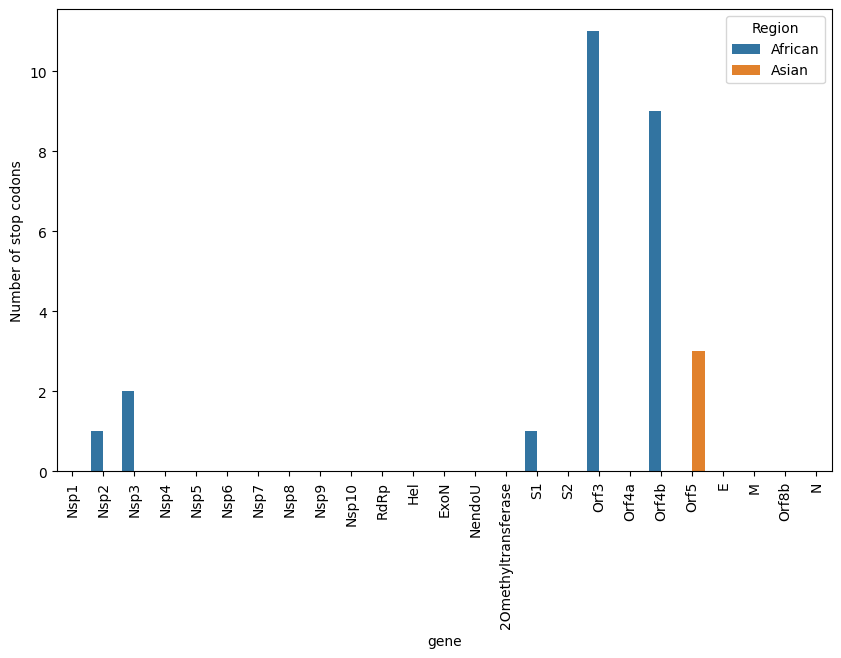

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gene', y='num_stops', hue='region', data=df)
plt.ylabel('Number of stop codons')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()